In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [4]:
import warnings
import os
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [6]:
print(os.listdir("../input/"))

['house-prices-advanced-regression-techniques']


In [8]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [9]:
pp.ProfileReport(train)

In [10]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

In [11]:
y = train[['Id','SalePrice']]
train = train.drop('SalePrice',axis=1)

In [12]:
all_dfs = [train,test]
all_df = pd.concat(all_dfs).reset_index(drop=True)

In [13]:
display_all(all_df.isnull().sum()/all_df.shape[0])


Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
Alley            0.932169
LotShape         0.000000
LandContour      0.000000
Utilities        0.000685
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000343
Exterior2nd      0.000343
MasVnrType       0.008222
MasVnrArea       0.007879
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.027749
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtFinType1     0.027064
BsmtFinSF1       0.000343
BsmtFinType2     0.027407
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF 

In [14]:
all_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],axis=1,inplace=True)

In [15]:
all_df['LotFrontage'].fillna(value=all_df['LotFrontage'].median(),inplace=True)
all_df['MasVnrType'].fillna(value='None',inplace=True)
all_df['MasVnrArea'].fillna(0,inplace=True)
all_df['BsmtCond'].fillna(value='TA',inplace=True)
all_df['BsmtExposure'].fillna(value='No',inplace=True)
all_df['Electrical'].fillna(value='SBrkr',inplace=True)
all_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
all_df['GarageType'].fillna(value='Attchd',inplace=True)
all_df['GarageYrBlt'].fillna(value=all_df['GarageYrBlt'].median(),inplace=True)
all_df['GarageFinish'].fillna(value='Unf',inplace=True)
all_df['GarageQual'].fillna(value='TA',inplace=True)
all_df['GarageCond'].fillna(value='TA',inplace=True)
all_df['BsmtFinType1'].fillna(value='NO',inplace=True)
all_df['BsmtQual'].fillna(value='No',inplace=True)
all_df['BsmtFullBath'].fillna(value=all_df['BsmtFullBath'].median(),inplace=True)
all_df['BsmtFinSF1'].fillna(value=all_df['BsmtFinSF1'].median(),inplace=True)
all_df['BsmtFinSF2'].fillna(value=0,inplace=True)
all_df['BsmtUnfSF'].fillna(value=0,inplace=True)
all_df['TotalBsmtSF'].fillna(value=all_df['TotalBsmtSF'].median(),inplace=True)
all_df['BsmtHalfBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=all_df['GarageCars'].median(),inplace=True)
all_df['GarageArea'].fillna(value=all_df['GarageArea'].median(),inplace=True)

In [16]:
labelencoder=LabelEncoder()

all_df['MSZoning']      = labelencoder.fit_transform(all_df['MSZoning'].astype(str))
all_df['Exterior1st']   = labelencoder.fit_transform(all_df['Exterior1st'].astype(str))
all_df['Exterior2nd']   = labelencoder.fit_transform(all_df['Exterior2nd'].astype(str))
all_df['KitchenQual']   = labelencoder.fit_transform(all_df['KitchenQual'].astype(str))
all_df['Functional']    = labelencoder.fit_transform(all_df['Functional'].astype(str))
all_df['SaleType']      = labelencoder.fit_transform(all_df['SaleType'].astype(str))
all_df['Street']        = labelencoder.fit_transform(all_df['Street'])   
all_df['LotShape']      = labelencoder.fit_transform(all_df['LotShape'])   
all_df['LandContour']   = labelencoder.fit_transform(all_df['LandContour'])   
all_df['LotConfig']     = labelencoder.fit_transform(all_df['LotConfig'])   
all_df['LandSlope']     = labelencoder.fit_transform(all_df['LandSlope'])   
all_df['Neighborhood']  = labelencoder.fit_transform(all_df['Neighborhood'])   
all_df['Condition1']    = labelencoder.fit_transform(all_df['Condition1'])   
all_df['Condition2']    = labelencoder.fit_transform(all_df['Condition2'])   
all_df['BldgType']      = labelencoder.fit_transform(all_df['BldgType'])   
all_df['HouseStyle']    = labelencoder.fit_transform(all_df['HouseStyle'])   
all_df['RoofStyle']     = labelencoder.fit_transform(all_df['RoofStyle'])   
all_df['RoofMatl']      = labelencoder.fit_transform(all_df['RoofMatl'])    
all_df['MasVnrType']    = labelencoder.fit_transform(all_df['MasVnrType'])   
all_df['ExterQual']     = labelencoder.fit_transform(all_df['ExterQual'])  
all_df['ExterCond']     = labelencoder.fit_transform(all_df['ExterCond'])   
all_df['Foundation']    = labelencoder.fit_transform(all_df['Foundation'])   
all_df['BsmtQual']      = labelencoder.fit_transform(all_df['BsmtQual'])   
all_df['BsmtCond']      = labelencoder.fit_transform(all_df['BsmtCond'])   
all_df['BsmtExposure']  = labelencoder.fit_transform(all_df['BsmtExposure'])   
all_df['BsmtFinType1']  = labelencoder.fit_transform(all_df['BsmtFinType1'])   
all_df['BsmtFinType2']  = labelencoder.fit_transform(all_df['BsmtFinType2'])   
all_df['Heating']       = labelencoder.fit_transform(all_df['Heating'])   
all_df['HeatingQC']     = labelencoder.fit_transform(all_df['HeatingQC'])   
all_df['CentralAir']    = labelencoder.fit_transform(all_df['CentralAir'])   
all_df['Electrical']    = labelencoder.fit_transform(all_df['Electrical'])    
all_df['GarageType']    = labelencoder.fit_transform(all_df['GarageType'])  
all_df['GarageFinish']  = labelencoder.fit_transform(all_df['GarageFinish'])   
all_df['GarageQual']    = labelencoder.fit_transform(all_df['GarageQual'])  
all_df['GarageCond']    = labelencoder.fit_transform(all_df['GarageCond'])   
all_df['PavedDrive']    = labelencoder.fit_transform(all_df['PavedDrive'])  
all_df['SaleCondition'] = labelencoder.fit_transform(all_df['SaleCondition'])  

In [17]:
Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))

train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled = pd.DataFrame(all_scaled[1460:2920])

In [18]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

In [19]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

[11:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.001, reg_lambda=1e-06, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [20]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))
print ("Training score:",LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

Training score: 0.9984383142362594 Test Score: 0.9360790407423961
Training score: 0.9999557727264998 Test Score: 0.9101390980189892


In [22]:
y_pred_xgb  = pd.DataFrame( XGB.predict(test_scaled))
y_pred_lgbm = pd.DataFrame(LGBM.predict(test_scaled))

y_pred=pd.DataFrame()
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

In [23]:
y_pred.to_csv('house_price_blend.csv',index=False)

In [24]:
from yellowbrick.regressor import ResidualsPlot

from yellowbrick.regressor import PredictionError

from yellowbrick.model_selection import ValidationCurve

ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fba4c9cd588>,
              hist=True, is_fitted='auto', line_color=None, model=None,
              test_alpha=None, test_color=None, train_alpha=None,
              train_color=None)

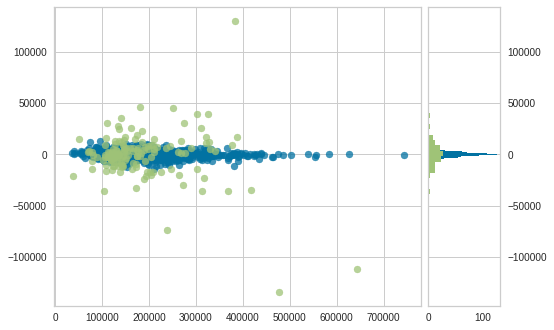

In [25]:
visualizer = ResidualsPlot(XGB)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer

In [ ]:
model = Lasso(alpha=10)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
                 